In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
image_size = (128, 128)
batch_size = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    validation_split=0.2,
    subset="training",
    shuffle = True,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    validation_split=0.2,
    subset="validation",
    shuffle = True,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Testing",
    image_size=image_size,
    batch_size=batch_size,
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [29]:
rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])

train_ds = train_ds.map(
    lambda x, y: (rescale(x, training=True), y))
val_ds = val_ds.map(
    lambda x, y: (rescale(x, training=True), y))
test_ds = test_ds.map(
    lambda x, y: (rescale(x, training=True), y))

In [30]:
base_model = keras.applications.VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(128, 128, 3)))
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_14 (Dropout)        (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               1048704   
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 516       
                                                                 
Total params: 15,763,908
Trainable params: 1,049,220
N

In [31]:
model.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [33]:
model_history = model.fit(x=train_ds, validation_data=val_ds, epochs=5, callbacks=early_stopping)

Epoch 1/5
36/36 [==============================] - 399s 11s/step - loss: 0.8063 - accuracy: 0.6906 - val_loss: 0.4038 - val_accuracy: 0.8555
Epoch 2/5
36/36 [==============================] - 410s 11s/step - loss: 0.3800 - accuracy: 0.8534 - val_loss: 0.3363 - val_accuracy: 0.8608
Epoch 3/5
36/36 [==============================] - 412s 12s/step - loss: 0.3101 - accuracy: 0.8851 - val_loss: 0.2763 - val_accuracy: 0.9037
Epoch 4/5
36/36 [==============================] - 411s 11s/step - loss: 0.2709 - accuracy: 0.8954 - val_loss: 0.2422 - val_accuracy: 0.9177
Epoch 5/5
36/36 [==============================] - 435s 12s/step - loss: 0.2448 - accuracy: 0.9057 - val_loss: 0.2288 - val_accuracy: 0.9247


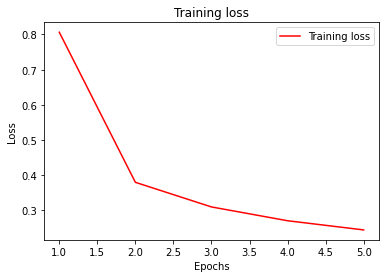

In [34]:
history_dict = model_history.history
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

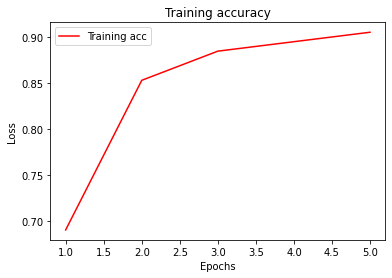

In [35]:
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
result = model.evaluate(test_ds) # Devuelve pérdida y accuracy
result

11/11 [==============================] - 96s 9s/step - loss: 0.2850 - accuracy: 0.9001


[0.2849745452404022, 0.9000762701034546]